<a href="https://colab.research.google.com/github/ipediz/BachehayekhafaneTMU/blob/main/DAG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code was mostly written with the aid of CHat GPT

``
# This is formatted as code
```



In [ ]:
!pip install dowhy

import pandas as pd
import networkx as nx
from dowhy import CausalModel
import matplotlib.pyplot as plt

Data = pd.read_csv("The_new_all_state_replication_data.csv")
Data['interaction'] = Data['interaction'] / 100
Data['percent_over_60'] = Data['percent_over_60'] / 100
# setting 'county_code' as index and 'new_timeperiod' as time
Data = Data.set_index(['county_code', 'new_timeperiod'])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
from tabulate import tabulate
#dropping non-relative variables for summary statistics table
columns_to_drop = [
    'relative_time_m8andbeyond', 'relative_time_m7', 'relative_time_m6', 'relative_time_m5',
    'relative_time_m4', 'relative_time_m3', 'relative_time_m2', 'relative_time_m1', 'relative_time_0',
    'relative_time_p1', 'relative_time_p2', 'relative_time_p3', 'relative_time_p4',
    'relative_time_p5', 'relative_time_p6', 'relative_time_p7', 'relative_time_p8andbeyond',
    'cem_strata', 'cem_weights'
]

# Create a new dataframe without the specified columns
Data1 = Data.drop(columns=columns_to_drop)

In [ ]:
Data1 = Data1.dropna();
columns_to_drop = [
    'nonbusiness_bankruptcy_percapita','business_bankruptcy_percapita', 'log_bankruptcy' ]

# Create a new dataframe without the specified columns
Data1_DAG= Data1.drop(columns=columns_to_drop)

In [ ]:
# List all column names from the dataset
print(Data1_DAG.columns)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Index(['lending_club_available', 'bankruptcy_per_capita',
       'population_estimation', 'employed_individuals', 'monthly_earnings',
       'labor_force', 'medianhouseholdincome', 'percent_over_60',
       'interaction'],
      dtype='object')


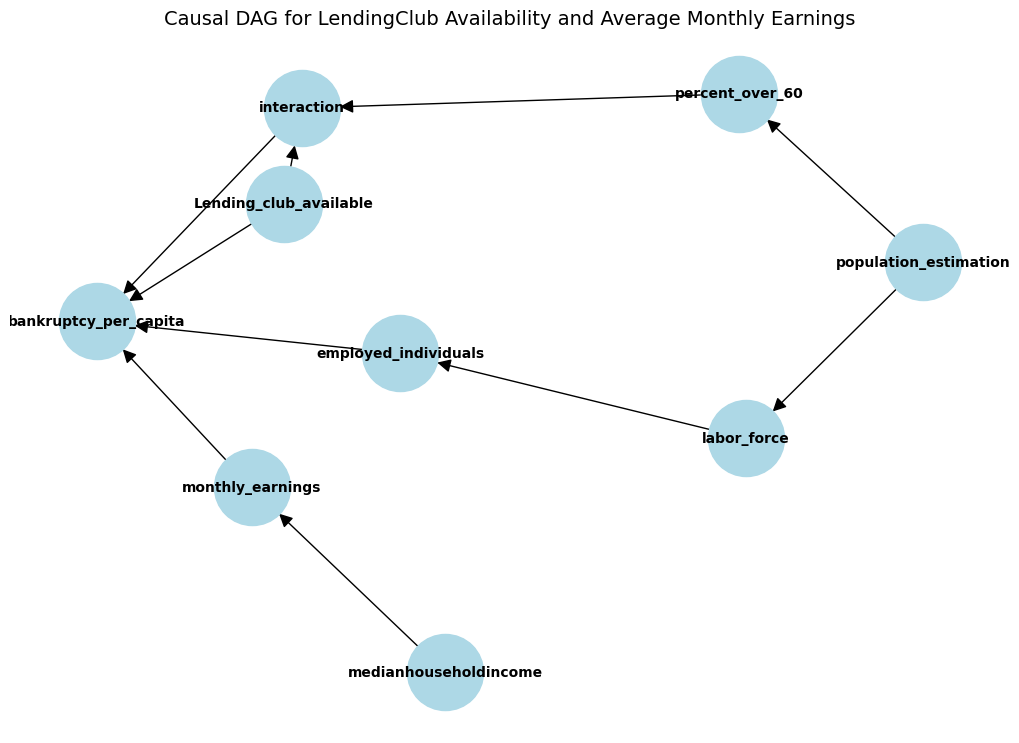

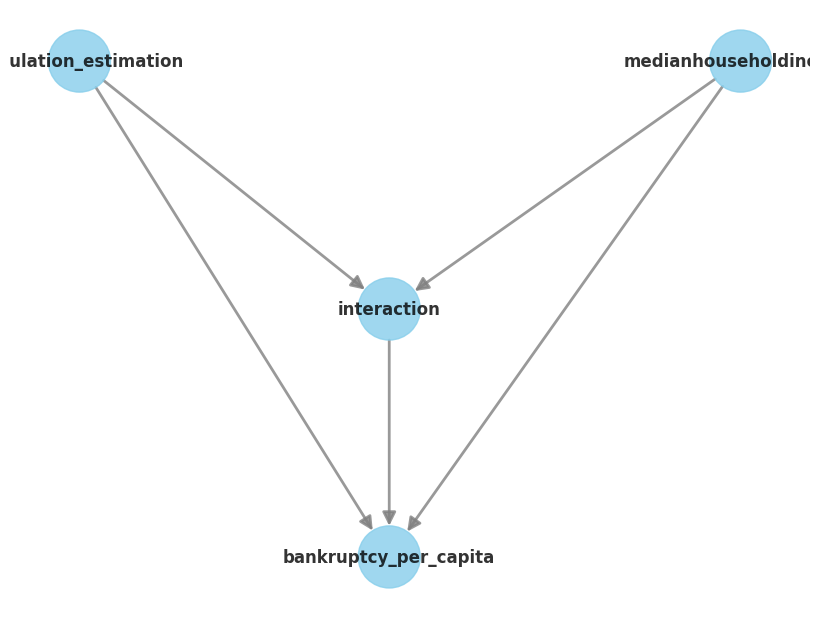

In [ ]:

model = CausalModel(
    data=Data1_DAG,
    treatment='interaction',
    outcome='bankruptcy_per_capita',
    common_causes=['population_estimation',
    'medianhouseholdincome',
    ]
)
model.view_model(layout="dot")
plt.show()

In [ ]:
estimand = model.identify_effect()
print(estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                             
──────────────(E[bankruptcy_per_capita|medianhouseholdincome,population_estimation])
d[interaction]                                                                      
Estimand assumption 1, Unconfoundedness: If U→{interaction} and U→bankruptcy_per_capita then P(bankruptcy_per_capita|interaction,medianhouseholdincome,population_estimation,U) = P(bankruptcy_per_capita|interaction,medianhouseholdincome,population_estimation)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.linear_regression'  # Choose the correct method for your model
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                             
──────────────(E[bankruptcy_per_capita|medianhouseholdincome,population_estimation])
d[interaction]                                                                      
Estimand assumption 1, Unconfoundedness: If U→{interaction} and U→bankruptcy_per_capita then P(bankruptcy_per_capita|interaction,medianhouseholdincome,population_estimation,U) = P(bankruptcy_per_capita|interaction,medianhouseholdincome,population_estimation)

## Realized estimand
b: bankruptcy_per_capita~interaction+medianhouseholdincome+population_estimation
Target units: ate

## Estimate
Mean value: -0.1440600050951536



In [ ]:
refute_subset = model.refute_estimate(
    estimand=estimand,
    estimate=estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.4
)
print(refute_subset)


Refute: Use a subset of data
Estimated effect:-0.1440600050951536
New effect:-0.1461611161959288
p value:0.88

